<a href="https://colab.research.google.com/github/joserlandero/Aprendizaje-Automatico/blob/main/Tarea5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Recargamos la base de datos del cafe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
df = pd.read_csv('/content/medical_insurance.csv')

# Algoritmo elegido: DBSCAN
## DBSCAN

El algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es bueno porque detecta grupos de datos con formas arbitrarias y no necesita definir el número de clústeres previamente, a diferencia de K-Means.

Funciona identificando zonas con alta densidad de puntos: si un punto tiene suficientes vecinos dentro de una distancia determinada (ε), se considera parte de un clúster; los puntos que no cumplen este criterio se clasifican como ruido o anomalías.

Puede ser mejor que K-Means porque maneja bien los outliers, no asume que los clústeres sean esféricos, y detecta agrupamientos de distinta densidad, algo que K-Means no logra fácilmente. Sin embargo, requiere ajustar parametros como el epsilon.

## Justificación de clusters en DBSCAN

En el caso de DBSCAN, no es necesario determinar previamente el número de grupos, ya que el algoritmo los forma de manera automática según la densidad de los datos. Por lo tanto, en lugar de usar índices como Calinski-Harabasz o Davies-Bouldin, la elección adecuada consiste en ajustar los parámetros epsilon y minPts para obtener una separación coherente entre los clústeres y detectar correctamente las zonas de ruido.

En lugar de elegir una métrica para determinar el número de grupos, se seleccionaron criterios para encontrar los mejores parámetros espilon y minPts, los cuales determinan cómo se forman los clústeres en DBSCAN.

## ¿Cómo encontrar los mejores parametros e y minpts?

- Usar un gráfico k-distancia (k-distance plot) para identificar el valor de ε, observando el punto donde la curva presenta un cambio brusco (“codo”).

- Definir minPts como al menos el doble de la dimensión del dataset (por ejemplo, 4 variables → minPts ≈ 8).

- Luego, validar visualmente los resultados o con un índice como Silhouette, pero solo como referencia de calidad, no para determinar k.

In [13]:
print(df['chronic_count'].unique())

[1 2 3 0 4 5 6]


In [15]:
print(df.head(5))

   person_id  age     sex   region urban_rural   income     education  \
0      75722   52  Female    North    Suburban  22700.0     Doctorate   
1      80185   79  Female    North       Urban  12800.0         No HS   
2      19865   68    Male    North       Rural  40700.0            HS   
3      76700   15    Male    North    Suburban  15600.0  Some College   
4      92992   53    Male  Central    Suburban  89600.0     Doctorate   

  marital_status employment_status  household_size  ...  liver_disease  \
0        Married           Retired               3  ...              0   
1        Married          Employed               3  ...              0   
2        Married           Retired               5  ...              0   
3        Married     Self-employed               5  ...              0   
4        Married     Self-employed               2  ...              0   

   arthritis mental_health proc_imaging_count  proc_surgery_count  \
0          1             0                  1  

Nos basaremos de las variables seleccionadas de la tarea 4

In [3]:
Variables = ['age', 'visits_last_year', 'hospitalizations_last_3yrs',
       'days_hospitalized_last_3yrs', 'medication_count', 'risk_score',
       'claims_count', 'avg_claim_amount', 'total_claims_paid',
       'chronic_count', 'hypertension',
       'mental_health', 'is_high_risk', 'had_major_procedure','monthly_premium']

In [4]:
df = df[Variables]
df.head(5)

,age,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,risk_score,claims_count,avg_claim_amount,total_claims_paid,chronic_count,hypertension,mental_health,is_high_risk,had_major_procedure,monthly_premium
0,52,2,0,0,4,0.5714,1,4672.59,4672.59,1,0,0,0,0,73.00
1,79,2,0,0,3,1.0000,4,297.27,1189.08,2,0,1,1,0,37.09
2,68,1,0,0,4,1.0000,0,0.00,0.00,3,1,1,1,0,128.17
3,15,0,0,0,1,0.2857,0,0.00,0.00,1,0,0,0,0,68.39
4,53,3,0,0,2,0.8681,1,1002.24,1002.24,2,1,0,1,0,41.74


In [5]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled, columns = df.columns)
df_scaled

,age,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,risk_score,claims_count,avg_claim_amount,total_claims_paid,chronic_count,hypertension,mental_health,is_high_risk,had_major_procedure,monthly_premium
0,0.52,0.08,0.0,0.0,0.363636,0.5714,0.043478,0.155698,0.064434,0.166667,0.0,0.0,0.0,0.0,0.061792
1,0.79,0.08,0.0,0.0,0.272727,1.0000,0.173913,0.009906,0.016397,0.333333,0.0,1.0,1.0,0.0,0.021710
2,0.68,0.04,0.0,0.0,0.363636,1.0000,0.000000,0.000000,0.000000,0.500000,1.0,1.0,1.0,0.0,0.123372
3,0.15,0.00,0.0,0.0,0.090909,0.2857,0.000000,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.0,0.056646
4,0.53,0.12,0.0,0.0,0.181818,0.8681,0.043478,0.033396,0.013821,0.333333,1.0,0.0,1.0,0.0,0.026900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.50,0.00,0.0,0.0,0.090909,0.3516,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.010939
99996,0.42,0.00,0.0,0.0,0.090909,0.2637,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.019768
99997,0.41,0.28,0.0,0.0,0.090909,0.4505,0.347826,0.010415,0.034481,0.166667,1.0,0.0,0.0,0.0,0.030070
99998,0.51,0.16,0.0,0.0,0.181818,0.5604,0.086957,0.018406,0.015234,0.166667,0.0,1.0,0.0,0.0,0.012200


# Ejercicio con 2 variables

In [6]:
print(df_scaled['risk_score'].unique())

[0.5714 1.     0.2857 0.8681 0.6923 0.1978 0.3187 0.8571 0.7582 0.4396
 0.1648 0.3736 0.7692 0.0659 0.3956 0.4725 0.1538 0.5494 0.7473 0.8352
 0.2747 0.3846 0.7143 0.4615 0.9011 0.5055 0.5824 0.4286 0.3297 0.978
 0.3077 0.7802 0.5604 0.3516 0.5934 0.2418 0.4945 0.4066 0.8901 0.1868
 0.4505 0.3626 0.6703 0.6264 0.5385 0.8242 0.011  0.1319 0.4176 0.2527
 0.3407 0.0879 0.2967 0.1429 0.6813 0.4835 0.8132 0.5275 0.2198 0.1758
 0.9231 0.2088 0.9451 0.6593 0.9341 0.6484 0.6044 0.5165 0.6374 0.7363
 0.     0.2637 0.8022 0.7253 0.6154 0.044  0.989  0.0989 0.7033 0.022
 0.9121 0.8791 0.033  0.8462 0.2308 0.956  0.967  0.0769 0.0549 0.1099
 0.7912 0.1209]


In [19]:
df_test = df_scaled[['age','visits_last_year']]
df_test_2= df_test.iloc[0:25001]

dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(df_test_2)

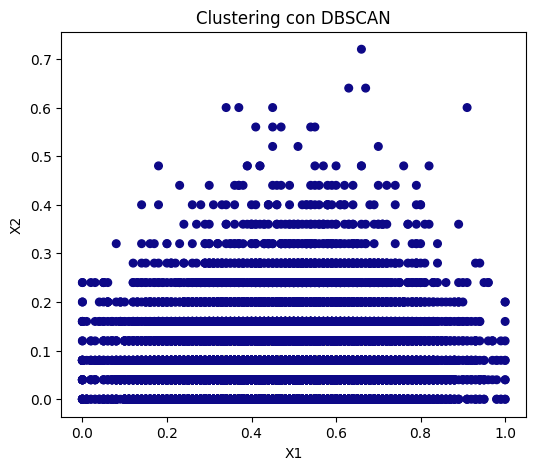

In [20]:
# 3️⃣ Visualizamos los resultados]
plt.figure(figsize=(6,5))
plt.scatter(df_test_2['age'], df_test_2['visits_last_year'], c=labels, cmap='plasma', s=30)
plt.title("Clustering con DBSCAN")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

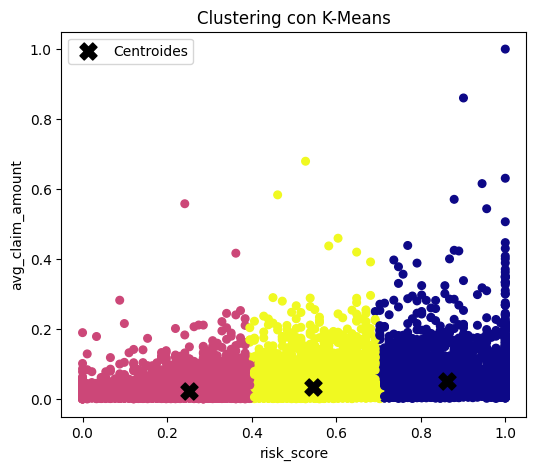

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1️⃣ Datos
df_test = df_scaled[['risk_score', 'monthly_premium']]
df_test_2 = df_test.iloc[0:25001]

# 2️⃣ Aplicar K-Means (por ejemplo, 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df_test_2)

# 3️⃣ Visualizar resultados
plt.figure(figsize=(6,5))
plt.scatter(df_test_2['risk_score'], df_test_2['monthly_premium'], c=labels, cmap='plasma', s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='X', s=150, label='Centroides')
plt.title("Clustering con K-Means")
plt.xlabel("risk_score")
plt.ylabel("avg_claim_amount")
plt.legend()
plt.show()


# Conclusión
En conclusión, los datos no son los más adecuados para aplicar técnicas de clustering porque varias variables son binarias o discretas, lo que genera patrones artificiales en lugar de densidades continuas. Además, la mayoría de los registros se concentran en una misma región del espacio, impidiendo que algoritmos como DBSCAN o K-Means identifiquen grupos naturales o bien separados.
